# **Classification Model**

## **Logistic Model**


### **Import Library**

In [27]:
from sklearn.model_selection import train_test_split #type: ignore
from sklearn.preprocessing import StandardScaler #type: ignore
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression #type: ignore
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix #type: ignore
import matplotlib.pyplot as plt #type: ignore
import pandas as pd #type: ignore

### **Import Data**

In [28]:
df = pd.read_csv('/Users/narasi29/Documents/Sem 7/Machine Learning/Week 2/Assignment Week 2/Dataset-Week_2/CitarumWater.csv')
df.head()

,No,NamaSungai,TitikPantau,Waktu,pH,Temp,TSS,DO,BOD,COD,Nitrat,FecalColiform,Fosfat,O2,IP,Class
0,1,Citarum,Wangisagara,18/04/2018,7.57,25.55°C,11.0,6.11,3.30,6.10,1.08,17000.0,0.043,-,5.12,3
1,2,Citarum,Koyod,18/04/2018,7.69,25.55°C,13.0,6.20,5.31,12.50,1.85,28000.0,0.011,-,5.91,3
2,3,Citarum,Setelah IPAL Cisirung,18/04/2018,7.39,25.55°C,15.0,3.61,7.40,23.50,1.25,90000.0,0.230,-,7.76,3
3,4,Citarum,Nanjung,18/04/2018,7.49,25.55°C,17.0,3.17,8.13,27.50,1.21,300000.0,0.057,-,9.61,3
4,5,Citarum,Outlet Waduk Jatiluhur,18/04/2018,7.17,25.55°C,6.0,6.82,2.89,5.44,1.04,3000.0,0.110,-,2.44,2


### ****

### **Cleaning Data**

In [29]:
citarum_data = df.drop(['No', 'NamaSungai','TitikPantau', 'Waktu', 'O2'], axis=1)

citarum_data['Temp'] = citarum_data['Temp'].str.replace('°C', '').astype(float)

citarum_data.fillna(citarum_data.mean(), inplace=True)

citarum_data.head()



,pH,Temp,TSS,DO,BOD,COD,Nitrat,FecalColiform,Fosfat,IP,Class
0,7.57,25.55,11.0,6.11,3.30,6.10,1.08,17000.0,0.043,5.12,3
1,7.69,25.55,13.0,6.20,5.31,12.50,1.85,28000.0,0.011,5.91,3
2,7.39,25.55,15.0,3.61,7.40,23.50,1.25,90000.0,0.230,7.76,3
3,7.49,25.55,17.0,3.17,8.13,27.50,1.21,300000.0,0.057,9.61,3
4,7.17,25.55,6.0,6.82,2.89,5.44,1.04,3000.0,0.110,2.44,2


### **Split Data : Features and Target**

In [30]:
X = citarum_data.drop('Class', axis= 1)
Y = citarum_data['Class']


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### **Data Standarization**

In [31]:
# Standardize the data (important for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### **Train the Logistic Regression Model**

In [32]:
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

LogisticRegression()

### **Make Prediction**

In [33]:
y_pred = logreg.predict(X_test_scaled)

y_pred

array([2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2,
       1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 4, 2, 1, 1, 3, 1, 1, 2, 1,
       1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 3, 2, 1, 2, 1, 1, 2, 2, 1, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1,
       2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2,
       1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1,
       2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1,
       2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1,
       2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 3, 2, 1, 2, 2, 2,
       2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1,
       3, 1, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1,

### **Calculate Metrics**

In [34]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Display metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.958
Precision: 0.9581014492753622
Recall: 0.958
F1 Score: 0.9578799711093655


### **AUC & ROC Curve**

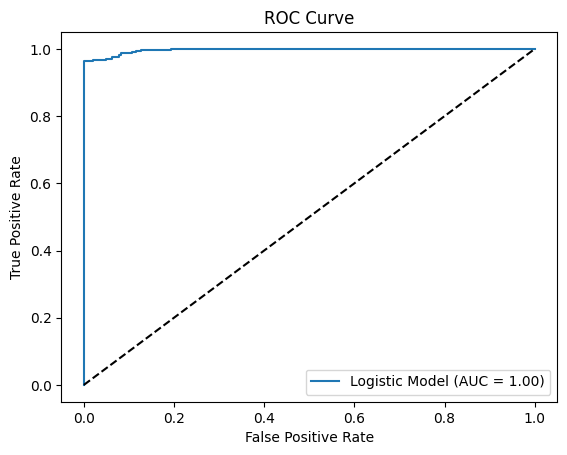

In [35]:
# Calculate AUC for multiclass classification using one-vs-rest (ovr) strategy
roc_auc = roc_auc_score(y_test, logreg.predict_proba(X_test_scaled), multi_class="ovr")

# Calculate ROC curve for the first class
fpr, tpr, _ = roc_curve(y_test, logreg.predict_proba(X_test_scaled)[:, 1], pos_label=logreg.classes_[1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f'Logistic Model (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


### **Confution Matrix**

ValueError: The number of FixedLocator locations (4), usually from a call to set_ticks, does not match the number of labels (2).

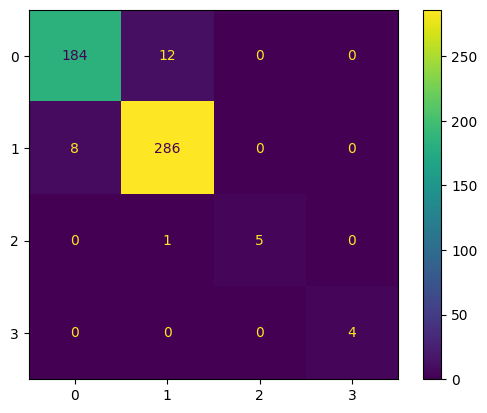

In [37]:
# Confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

# Display confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix,display_labels=[0,1])

cm_display.plot()
plt.show()